# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [102]:
# Pulling Cities list using API
units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url +"units=" + units + "&appid=" + weather_api_key + "&q="

x=1
count=1
city_name=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

print("Beginning Data Retrieval")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data = requests.get(query_url + city).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Data Retrieval Complete ")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Beginning Data Retrieval
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Processing Record 1 of set 1|aklavik
Processing Record 2 of set 1|qaanaaq
Processing Record 3 of set 1|dingle
Processing Record 4 of set 1|nerchinskiy zavod
Processing Record 5 of set 1|grand gaube
Processing Record 6 of set 1|gornopravdinsk
Processing Record 7 of set 1|urumqi
Processing Record 8 of set 1|georgetown
Processing Record 9 of set 1|arraial do cabo
Processing Record 10 of set 1|cap malheureux
Processing Record 11 of set 1|chokurdakh
Processing Record 12 of set 1|jardim
Processing Record 13 of set 1|busselton
Processing Record 14 of set 1|sinnamary
Processing Record 15 of set 1|upernavik
Processing Record 16 of set 1|sao filipe
Processing Record 17 of set 1|punta arenas
Processing Record 18 of set 1|kualakapuas
Processing Record 19 of set 1|lompoc
Processing Record 20 of set 1|sao joao da barra
Processing Record 21 of set 1|albany
Processing Record 22 of set 1|kaeo
Processing Record 23 of set 1|barrow
Processing Record 24

Processing Record 46 of set 4|gelemso
City not found. Skipping... 
Processing Record 47 of set 4|kanigoro
City not found. Skipping... 
Processing Record 48 of set 4|obigarm
Processing Record 49 of set 4|portland
Processing Record 50 of set 4|krasnouralsk
Processing Record 1 of set 5|bonthe
Processing Record 2 of set 5|bambous virieux
Processing Record 3 of set 5|zhangjiakou
City not found. Skipping... 
Processing Record 4 of set 5|taicheng
Processing Record 5 of set 5|mar del plata
Processing Record 6 of set 5|hofn
Processing Record 7 of set 5|hanting
Processing Record 8 of set 5|mogadishu
Processing Record 9 of set 5|ixtapa
Processing Record 10 of set 5|provost
Processing Record 11 of set 5|balikpapan
Processing Record 12 of set 5|bowen
Processing Record 13 of set 5|port augusta
Processing Record 14 of set 5|yutsa
Processing Record 15 of set 5|baruun-urt
Processing Record 16 of set 5|okhotsk
Processing Record 17 of set 5|beringovskiy
Processing Record 18 of set 5|coolum beach
Processi

Processing Record 45 of set 8|rajmahal
Processing Record 46 of set 8|yinchuan
Processing Record 47 of set 8|kununurra
Processing Record 48 of set 8|bumba
City not found. Skipping... 
Processing Record 49 of set 8|gunjur
Processing Record 50 of set 8|pirapozinho
Processing Record 1 of set 9|misawa
Processing Record 2 of set 9|fairhope
Processing Record 3 of set 9|beni
Processing Record 4 of set 9|sibolga
City not found. Skipping... 
Processing Record 5 of set 9|lyngseidet
City not found. Skipping... 
Processing Record 6 of set 9|presque isle
Processing Record 7 of set 9|dongling
Processing Record 8 of set 9|grootfontein
Processing Record 9 of set 9|carutapera
City not found. Skipping... 
Processing Record 10 of set 9|saint george
Processing Record 11 of set 9|xichang
City not found. Skipping... 
Processing Record 12 of set 9|tura
Processing Record 13 of set 9|meulaboh
Processing Record 14 of set 9|ciudad del maiz
Processing Record 15 of set 9|ambon
Processing Record 16 of set 9|bontang


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
cityweather_df = pd.DataFrame({"City":city_name,"Latitude":lat,"Longitute":long,"Max Temperature":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind Speed":Wind_Speed,"Country":Country,"Date":Date})
cityweather_df.to_csv(output_data_file,index=False,header=True)
cityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,285.15,87,75,0.00,CA,1627309359
1,Qaanaaq,77.4840,-69.3632,279.21,56,86,3.88,GL,1627309359
2,Dingle,10.9995,122.6711,299.34,85,100,4.52,PH,1627309359
3,Nerchinskiy Zavod,51.3088,119.6100,287.39,94,8,2.71,RU,1627309360
4,Grand Gaube,-20.0064,57.6608,293.37,76,2,2.68,MU,1627309360
...,...,...,...,...,...,...,...,...,...
574,Kologriv,58.8275,44.3178,294.69,50,78,4.44,RU,1627309726
575,Aswān,24.0934,32.9070,313.66,11,7,6.01,EG,1627309726
576,Makeni,8.8833,-12.0500,300.41,84,58,1.80,SL,1627309727
577,Polyarny,69.1989,33.4478,284.41,79,94,7.74,RU,1627309727


In [104]:
cityweather_df.describe()

,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.678955,20.815539,295.497081,67.625216,56.360967,3.624404,1.627310e+09
std,33.161637,91.290874,8.312890,22.819120,38.397339,2.570954,1.305976e+02
min,-54.800000,-179.166700,272.960000,4.000000,0.000000,0.000000,1.627309e+09
25%,-6.617200,-61.899750,289.365000,55.000000,19.000000,1.690000,1.627309e+09
50%,23.266700,26.501900,297.650000,73.000000,69.000000,3.050000,1.627309e+09
75%,46.324800,102.990250,301.150000,85.000000,95.000000,5.040000,1.627310e+09
max,78.218600,179.316700,319.030000,100.000000,100.000000,15.560000,1.627310e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
humidcityweather_df = cityweather_df[cityweather_df["Humidity"] > 100]
humidcityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [106]:
#  Get the indices of cities that have humidity over 100%.


In [107]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


cleancityweather_df = cityweather_df[cityweather_df["Humidity"] <= 100]
cleancityweather_df

,City,Latitude,Longitute,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,285.15,87,75,0.00,CA,1627309359
1,Qaanaaq,77.4840,-69.3632,279.21,56,86,3.88,GL,1627309359
2,Dingle,10.9995,122.6711,299.34,85,100,4.52,PH,1627309359
3,Nerchinskiy Zavod,51.3088,119.6100,287.39,94,8,2.71,RU,1627309360
4,Grand Gaube,-20.0064,57.6608,293.37,76,2,2.68,MU,1627309360
...,...,...,...,...,...,...,...,...,...
574,Kologriv,58.8275,44.3178,294.69,50,78,4.44,RU,1627309726
575,Aswān,24.0934,32.9070,313.66,11,7,6.01,EG,1627309726
576,Makeni,8.8833,-12.0500,300.41,84,58,1.80,SL,1627309727
577,Polyarny,69.1989,33.4478,284.41,79,94,7.74,RU,1627309727


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

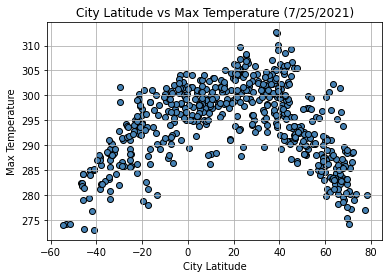

In [97]:
latit = cleancityweather_df["Latitude"]
Max_temp = cleancityweather_df["Max Temperature"]
lattempoutput = 'output_data/TempvsLat.png'
plt.scatter(latit, Max_temp, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()

plt.title (f"City Latitude vs Max Temperature (7/25/2021)")
plt.xlabel ("City Latitude")
plt.ylabel ("Max Temperature")
plt.savefig (lattempoutput)
plt.show()

## Latitude vs. Humidity Plot

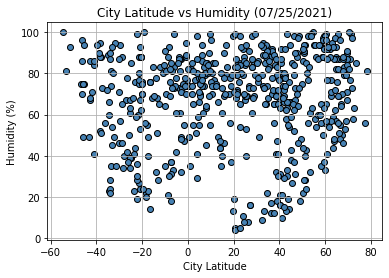

In [109]:
humidity = cleancityweather_df["Humidity"]
lathumoutput = 'output_data/LatvsHum.png'
plt.scatter(latit, humidity, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Humidity (07/25/2021)")
plt.xlabel ("City Latitude")
plt.ylabel ("Humidity (%)")
plt.savefig (lathumoutput)
plt.show()

## Latitude vs. Cloudiness Plot

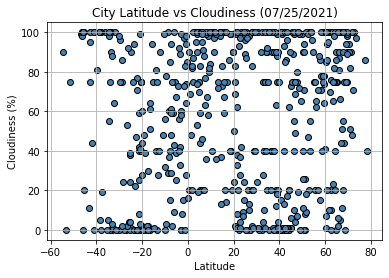

In [110]:
cloudiness = cleancityweather_df["Cloudiness"]
cloudlatoutput = 'output_data/LatvsCloud.png'
plt.scatter(latit, cloudiness, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Cloudiness (07/25/2021)")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.savefig (cloudlatoutput)
plt.show()

## Latitude vs. Wind Speed Plot

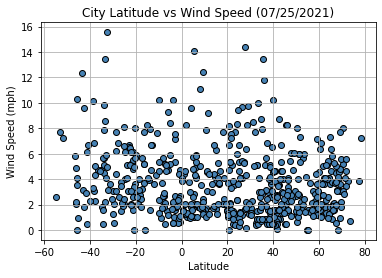

In [111]:
wind = cleancityweather_df["Wind Speed"]
latwindoutput = 'output_data/LatvsWind.png'

plt.scatter(latit, wind, marker="o", facecolors = "steelblue", edgecolor = 'black')

plt.grid()
plt.title ("City Latitude vs Wind Speed (07/25/2021)")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (mph)")
plt.savefig (latwindoutput)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42224390100708636


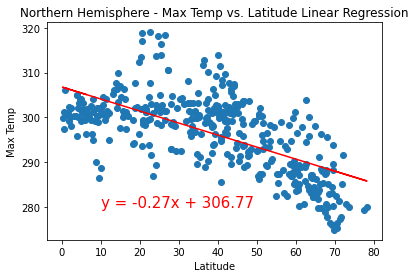

In [146]:
northhem_df = cleancityweather_df[cleancityweather_df["Latitude"]>0]

x_values = northhem_df['Latitude']
y_values = northhem_df['Max Temperature']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (10,280), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title ("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6209001440746156


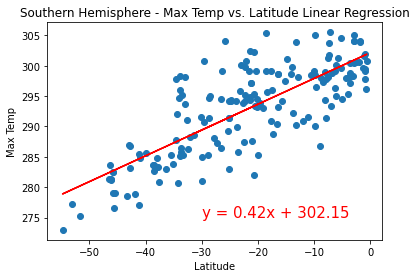

In [147]:
southhem_df = cleancityweather_df[cleancityweather_df["Latitude"]<0]

x_values = southhem_df['Latitude']
y_values = southhem_df['Max Temperature']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-30,275), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title ("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0022000152672631015


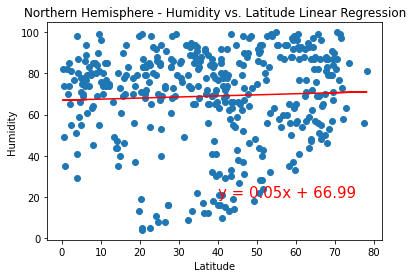

In [148]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title ("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0035099034243668056


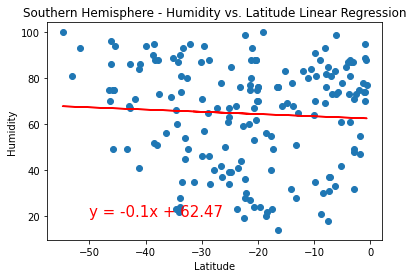

In [149]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Humidity']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-50,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title ("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00025994724873993437


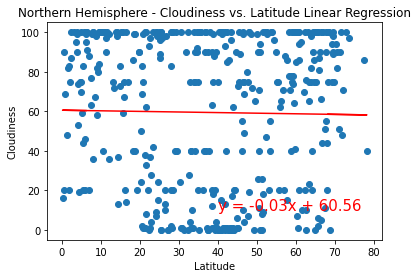

In [150]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,10), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title ("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013570505837154221


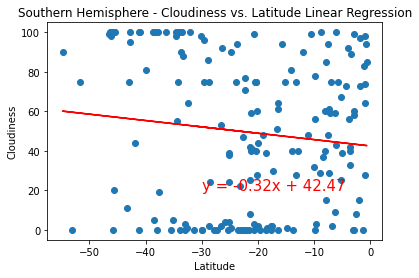

In [151]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-30,20), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title ("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0033202792492318905


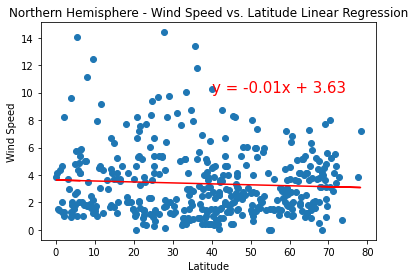

In [152]:
x_values = northhem_df['Latitude']
y_values = northhem_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (40,10), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title ("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03470631559915642


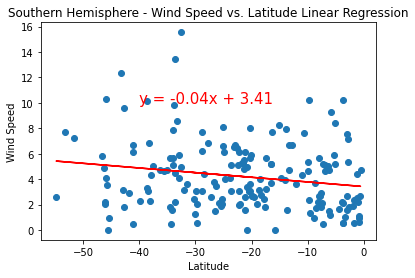

In [154]:
x_values = southhem_df['Latitude']
y_values = southhem_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values, marker="o")
plt.plot (x_values,regress_values, color = "red")
plt.annotate (line_eq, (-40,10), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title ("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.show()